In [1]:
import tensorflow as tf

new_model = tf.keras.models.load_model('diff_model.h5')
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
________________________________

In [2]:
encode_model = tf.keras.models.load_model('encode_model.h5')
encode_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [3]:
import numpy as np
import pickle

data=pickle.load(open('one_shot_inputs.pickle','rb'))

In [4]:
print(np.shape(data))

(156, 2)


In [5]:
data=np.asarray(data)
print(data)

[[array([0.        , 8.097372  , 0.13073428, ..., 0.        , 0.        ,
       0.26550743], dtype=float32)
  'shops']
 [array([0.        , 4.740665  , 0.        , ..., 0.05128904, 0.        ,
       1.7649796 ], dtype=float32)
  'shops']
 [array([0.        , 3.1897683 , 0.        , ..., 0.        , 0.11589367,
       0.18717921], dtype=float32)
  'shops']
 [array([0.02051763, 3.7797894 , 0.        , ..., 0.58908665, 0.        ,
       1.4942373 ], dtype=float32)
  'shops']
 [array([0.06810052, 6.629798  , 0.        , ..., 0.        , 0.        ,
       0.24617817], dtype=float32)
  'shops']
 [array([0.23327884, 3.9386475 , 0.11883484, ..., 0.        , 0.        ,
       0.6656349 ], dtype=float32)
  'shops']
 [array([ 0.13912554, 10.339495  ,  0.08360869, ...,  0.07297845,
        0.        ,  0.26144916], dtype=float32)
  'shops']
 [array([1.2134786 , 8.228564  , 0.        , ..., 0.05813516, 0.        ,
       1.7288184 ], dtype=float32)
  'shops']
 [array([0.3793854 , 6.9953985 , 0

In [6]:
label=np.array(data[:,1])
print(label)
print(np.shape(label))
print(np.shape(data))

['shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops'
 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops'
 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops'
 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops' 'shops'
 'shops' 'shops' 'shops' 'library' 'library' 'library' 'library' 'library'
 'library' 'library' 'library' 'library' 'library' 'library' 'library'
 'library' 'library' 'library' 'library' 'library' 'library' 'library'
 'library' 'library' 'library' 'library' 'library' 'library' 'library'
 'library' 'library' 'library' 'library' 'library' 'library' 'library'
 'library' 'library' 'library' 'library' 'library' 'library' 'ab3' 'ab3'
 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3'
 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3'
 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3' 'ab3'
 'ab3' 'ic' 'ic' 'ic' 'ic' 'ic' 'ic' 'ic' 'ic' 'ic' 'ic' 

In [7]:
import cv2
import matplotlib.pyplot as plt 

image_path="../Desktop/test_2.jpg"
imgs=cv2.imread(image_path,cv2.IMREAD_COLOR)
new=cv2.resize(imgs,(299,299))
input_data=encode_model.predict(np.expand_dims(new,0))
print(np.shape(input_data))

(1, 2048)


In [8]:
x=np.zeros((200,2048,))
i=0
for y in data[:,0]:
    x[i,:]=np.sqrt(np.square(y-input_data[0]))
    i=i+1
print(np.shape(x))
print(x)

(200, 2048)
[[0.73380131 7.99468946 0.54124945 ... 0.         0.         2.16156578]
 [0.73380131 4.63798237 0.67198372 ... 0.05128904 0.         0.66209364]
 [0.73380131 3.08708549 0.67198372 ... 0.         0.11589367 2.23989391]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [9]:
y=new_model.predict(x)

In [10]:
n=np.argmax(y)
print(n)
print(label[n])

67
library


In [11]:
if y[n]>0.5:
    print(label[n])

library


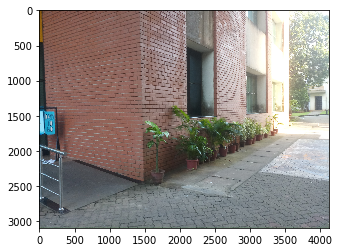

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()